Python Project 3- Due Date 12/28/23: Exploratory and Comparative Analysis:Data NYPD Arrest Data Year To Date 

                             **Python Fall 2023-Imran Khan, Jasmin Benjamin**

▪ PROJECT 3- COMPARATIVE ANALYSIS OF NYPD ARREST DATA YEAR TO DATE (CRIME DATA)

▪ DATA WEBSITE:https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc

▪ The goal of this project is to analyze NYPD arrest data

▪ Pick any zip code/neighborhood/district in this dataset as an initial comparison point

▪ Pick a feature/measure/column

▪ Compare above entity to any other (different) entity - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

▪ The analysis should include some descriptive statistics(mean,median,count)

▪ The analysis should include one cleaning task (or more)(renaming column,subset,missing value,drop columns)

▪ The analysis should include one visualization (or more)

▪ The analysis should include a brief conclusion statement that includes a discussion on bias (not more than four sentences)

ANALYSIS QUESTIONS: ▪What are the most common reasons for arrests in each borough? ▪Which gender has the highest number of arrests in each borough? ▪Which age group has the most arrests in each borough? ▪ Which borough had the total highest number of arrests?  ▪ Which Precinct had the highest number of arrest in each borough?

▪ DATA :This is a breakdown of every arrest effected in NYC by the NYPD during the current year. This data is manually extracted every quarter and reviewed by the Office of Management Analysis and Planning. Each record represents an arrest effected in NYC by the NYPD and includes information about the type of crime, the location and time of enforcement. In addition, information related to suspect demographics is also included. This data can be used by the public to explore the nature of police enforcement activity. 

▪ DATA DICTIONARY: NYPD_Arrest_YTD_DataDictionary.xlsx

▪ DATA FOOTNOTES: file:///C:/Users/Jasmin%20Benjamin/Downloads/NYPD_Arrest_Incident_Level_Data_Footnotes.pdf

▪ Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)

ADDITIONAL INFORMATION:

▪ 2020 Census population in each borough: 

Borough	   Population-
The Bronx-	1,472,654
Brooklyn-	2,736,074
Manhattan-	1,694,251
Queens-	    2,405,464
Staten Island-	495,747

▪ Borough	Poverty Rate

The Bronx-	24.4%
Brooklyn-	17.8%
Manhattan-	16.3%
Queens-	10.3%
Staten Island-	10.1%

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [116]:
#Import data
# Read the data set
df = pd.read_csv ('https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD') # Read the data set

In [57]:
#Rows and columns
df.shape

(170095, 19)

In [58]:
#descriptive statistics
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [59]:
#First rows
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)


In [60]:
#Last rows
df.tail()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,07/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984704,POINT (-73.98470449707197 40.70235306254946)


In [61]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [62]:
#Finding out if there are any duplicates in the dataframe
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
170090    False
170091    False
170092    False
170093    False
170094    False
Length: 170095, dtype: bool

In [63]:
#Total number of orignal columns
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [64]:
#Dropping columns I don't find necessary
drop_cols = ['X_COORD_CD', 'JURISDICTION_CODE','LAW_CAT_CD', 'KY_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']
df.drop(drop_cols, inplace = True, axis=1)

In [65]:
#Columns dropped
df.shape

(170095, 11)

In [66]:
#Printing to check if Columns actually dropped
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'OFNS_DESC',
       'LAW_CODE', 'ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX',
       'PERP_RACE'],
      dtype='object')

In [67]:
#Number of missing values in data
df.isnull().sum().sum()

0

In [68]:
#Checking if Columns werer actually dropped 
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,LAW_CODE,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 1200501,K,77,45-64,F,BLACK
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",DANGEROUS DRUGS,PL 2203901,K,73,25-44,M,BLACK
2,263664549,02/15/2023,105,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,K,62,25-44,M,WHITE
3,261345231,01/04/2023,105,STRANGULATION 1ST,FELONY ASSAULT,PL 1211200,M,32,25-44,M,BLACK
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,PL 12005WX,K,71,25-44,M,BLACK


In [39]:
# Group the data by BORO and OFNS_DESC, and count the frequency of each pair
grouped = df.groupby(["ARREST_BORO", "OFNS_DESC"]).size()

# Find the OFNS_DESC with the highest frequency for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

ARREST_BORO
B    (B, ASSAULT 3 & RELATED OFFENSES)
K    (K, ASSAULT 3 & RELATED OFFENSES)
M                   (M, PETIT LARCENY)
Q    (Q, ASSAULT 3 & RELATED OFFENSES)
S    (S, ASSAULT 3 & RELATED OFFENSES)
dtype: object


ARREST_BORO
B    (B, ASSAULT 3 & RELATED OFFENSES)
K    (K, ASSAULT 3 & RELATED OFFENSES)
M                   (M, PETIT LARCENY)
Q    (Q, ASSAULT 3 & RELATED OFFENSES)
S    (S, ASSAULT 3 & RELATED OFFENSES)
dtype: object


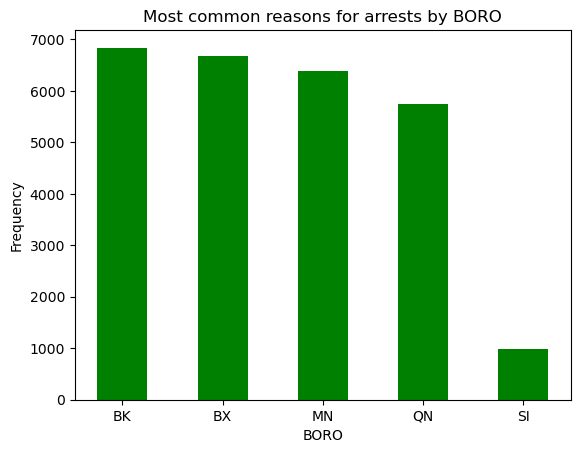

In [40]:
#VISUAL FOR QUESTION 1

# Group the data by BORO and OFNS_DESC, and count the frequency of each pair
grouped = df.groupby(["ARREST_BORO", "OFNS_DESC"]).size()

# Find the OFNS_DESC with the highest frequency for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

# Create a list of labels for each BORO
labels = ["BK", "BX", "MN", "QN", "SI"]

# Create a list of values for each BORO
values = [grouped[result[0]], grouped[result[1]], grouped[result[2]], grouped[result[3]], grouped[result[4]]]

# Plot the bar graph
plt.bar(labels, values, color='green', width=0.5, align='center')

# Add labels to the x-axis and y-axis
plt.xlabel("BORO")
plt.ylabel("Frequency")

# Add a title to the bar graph
plt.title("Most common reasons for arrests by BORO")

# Show the bar graph
plt.show()

NOTE:
ASSAULT 3 & RELATED OFFENSES is a term used in the New York Penal Law to describe various types of assault and other crimes that involve causing physical injury or fear of injury to another person. The definition and punishment of each offense depends on the degree, the intent, the weapon, and the victim of the assault. 
For example, assault in the third degree is a class A misdemeanor that occurs when a person intentionally, recklessly, or negligently causes physical injury to another person with a deadly weapon or a dangerous instrument.

PETIT LARCENY, also known as petty theft, is the minor crime of stealing items of relatively low value3. The legal definition and penalty of petit larceny vary by jurisdiction, but generally it is a misdemeanor that involves stealing property worth less than a certain amount, such as $5 or $1,000. 
Sources:
https://ypdcrime.com/penal.law/article155.php?zoom_highlight=petit+larceny
https://law.lis.virginia.gov/vacode/title18.2/chapter5/section18.2-96/   

Question 2: Which sex has the highest number of arrests in each borough?
Answer: The sex that have the highest number of arrest is Male for all boroughs.

In [89]:
# Group the data by BORO and SEX, and count the frequency of each pair
grouped = df.groupby(["ARREST_BORO", "PERP_SEX"]).size()

# Find the SEX with the highest frequency for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

ARREST_BORO
B    (B, M)
K    (K, M)
M    (M, M)
Q    (Q, M)
S    (S, M)
dtype: object


C:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


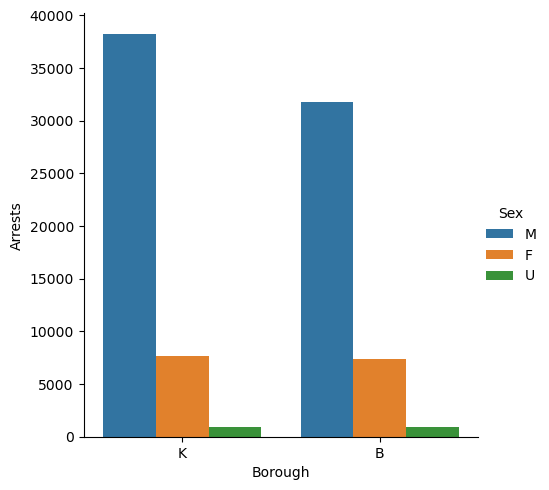

In [98]:
#VISUAL FOR QUESTION 2

#SEABORN GRAPH
df = df[df['ARREST_BORO'].isin(['K', 'B'])] # Filter the boroughs
df = df[['ARREST_BORO', 'PERP_SEX']] # Select the columns
df = df.groupby(['ARREST_BORO', 'PERP_SEX']).size() # Group by the borough and sex and count the arrests
df = df.sort_values(ascending=False) # Sort by the number of arrests
# print(df) # Print the result

# Create a new dataframe with the index as columns
df = df.reset_index()
# Rename the columns
df.columns = ['Borough', 'Sex', 'Arrests']
# Plot the dataframe using seaborn
sns.catplot(data=df, x='Borough', y='Arrests', hue='Sex', kind='bar')

Question 3:Which age group has the most arrests in each borough?
Answer: The age group with the most arrests in each borough is 25-44 years.

In [103]:
#I had to rewrite url link otherwise it would not work
url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Group the data by BORO and AGE_GROUP, and count the frequency of each pair
grouped = df.groupby(["ARREST_BORO", "AGE_GROUP"]).size()

# Find the AGE_GROUP with the highest frequency for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

ARREST_BORO
B    (B, 25-44)
K    (K, 25-44)
M    (M, 25-44)
Q    (Q, 25-44)
S    (S, 25-44)
dtype: object


ARREST_BORO
B    (B, 25-44)
K    (K, 25-44)
M    (M, 25-44)
Q    (Q, 25-44)
S    (S, 25-44)
dtype: object


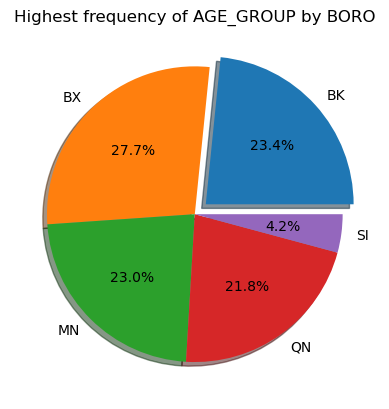

In [106]:
#VISUAL FOR QUESTION 3

# Group the data by BORO and AGE_GROUP, and count the frequency of each pair
grouped = df.groupby(["ARREST_BORO", "AGE_GROUP"]).size()

# Find the AGE_GROUP with the highest frequency for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

# Create a list of labels for each BORO
labels = ["BK", "BX", "MN", "QN", "SI"]

# Create a list of values for each BORO
values = [grouped[result[0]], grouped[result[1]], grouped[result[2]], grouped[result[3]], grouped[result[4]]]

# Plot the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%", explode=(0.1, 0, 0, 0, 0), shadow=True)

# Add a title
plt.title("Highest frequency of AGE_GROUP by BORO")

# Show the pie chart
plt.show()

Question 4: Which borough had the total highest number of arrests? 
Answer: The borough with the total highest number of arrests is Brooklyn.

In [107]:
df = df[['ARREST_BORO', 'ARREST_KEY']] # Select the columns
df = df.groupby ('ARREST_BORO').count () # Group by the borough and count the arrests
df = df.sort_values ('ARREST_KEY', ascending=False) # Sort by the number of arrests
print (df) # Print the result

             ARREST_KEY
ARREST_BORO            
K                 46825
B                 39957
M                 39652
Q                 36246
S                  7415


             ARREST_KEY
ARREST_BORO            
K                 46825
B                 39957
M                 39652
Q                 36246
S                  7415


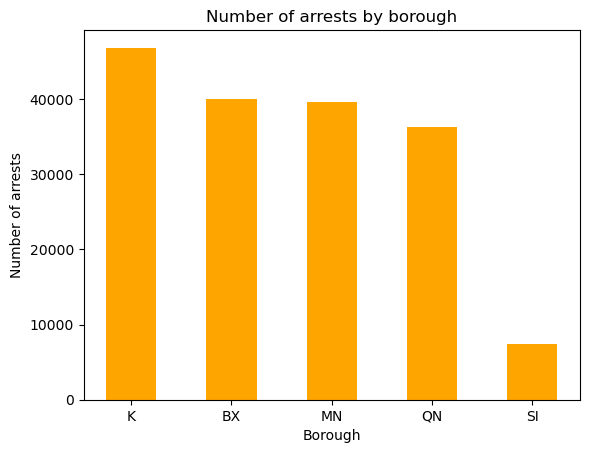

In [110]:
#VISUAL FOR QUESTION 4

url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Select the columns
df = df[['ARREST_BORO', 'ARREST_KEY']]

# Group by the borough and count the arrests
df = df.groupby('ARREST_BORO').count()

# Sort by the number of arrests
df = df.sort_values('ARREST_KEY', ascending=False)

# Print the result
print(df)

# Create a list of labels for the x-axis
x_axis = ['K', 'BX', 'MN', 'QN', 'SI']

# Create a list of values for the y-axis
y_axis = [df['ARREST_KEY']['K'], df['ARREST_KEY']['B'], df['ARREST_KEY']['M'], df['ARREST_KEY']['Q'], df['ARREST_KEY']['S']]

# Plot the bar graph
plt.bar(x_axis, y_axis, color='orange', width=0.5, align='center')

# Add labels to the x-axis and y-axis
plt.xlabel('Borough')
plt.ylabel('Number of arrests')

# Add a title to the bar graph
plt.title('Number of arrests by borough')

# Show the bar graph
plt.show()


             ARREST_KEY
ARREST_BORO            
K                 46825
B                 39957
M                 39652
Q                 36246
S                  7415


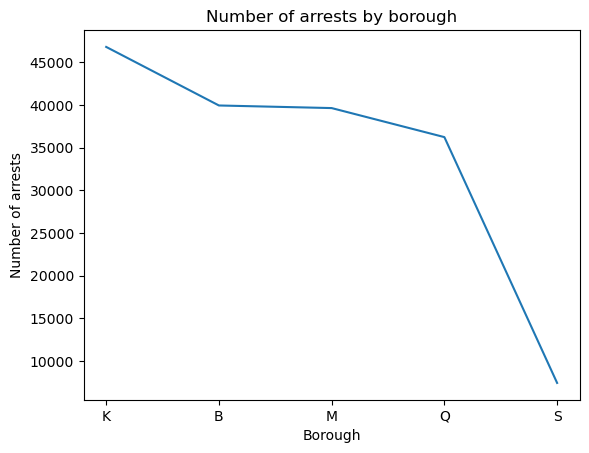

In [113]:
#SECOND VISUAL FOR QUESTION 4


url = "https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
# Select the columns
df = df[['ARREST_BORO', 'ARREST_KEY']]

# Group by the borough and count the arrests
df = df.groupby('ARREST_BORO').count()

# Sort by the number of arrests
df = df.sort_values('ARREST_KEY', ascending=False)

# Print the result
print(df)

# Create a list of values for the x-axis
x_axis = ['K', 'B', 'M', 'Q', 'S']

# Create a list of values for the y-axis
y_axis = [df['ARREST_KEY']['K'], df['ARREST_KEY']['B'], df['ARREST_KEY']['M'], df['ARREST_KEY']['Q'], df['ARREST_KEY']['S']]

# Plot the line graph
plt.plot(x_axis, y_axis)

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of arrests')
plt.title('Number of arrests by borough')

# Show the line graph
plt.show()

Question 5: Which Precincts had the highest number of arrest in each borough?
Answer: Precinct 44 in Bronx, 
75 in Brooklyn, 
14 in Manhattan, 
103 in Queens, and 
120 in Staten Island.     

In [117]:
# Group the data by BORO and PRECINCT, and calculate the sum of ARREST_KEY
grouped = df.groupby(["ARREST_BORO", "ARREST_PRECINCT"])["ARREST_KEY"].sum()

# Find the PRECINCT with the highest arrest for each BORO
result = grouped.groupby(level=0).idxmax()

# Print the result
print(result)

ARREST_BORO
B     (B, 44)
K     (K, 75)
M     (M, 14)
Q    (Q, 103)
S    (S, 120)
Name: ARREST_KEY, dtype: object


Conclusion: 

The data analysis shows that ASSAULT 3 & RELATED OFFENSES is the most common crime category in Brooklyn, and that males and 25-44 year olds are the most frequent offenders across all boroughs. The data also identifies the top five precincts with the highest number of arrests: 44 (Bronx), 75 (Brooklyn), 14 (Manhattan), 103 (Queens), and 120 (Staten Island). These precincts correspond to neighborhoods with high poverty rates and low income levels, suggesting a link between socio-economic factors and crime rates. For instance, Precinct 75 in Brooklyn covers East New York and Cypress Hill, which are among the poorest and most violent areas in the city.

Sources:
   ▪ https://realpython.com/pandas-python-explore-dataset/
   ▪ https://intersog.com/blog/the-basics-of-qa-systems-from-a-single-function-to-a-pre-trained-nlp-model-using-python/
   ▪ https://www.youtube.com/watch?v=Vm9wIcBMfhQ
   ▪ https://pythongeeks.org/python-scatter-plot/
   ▪ https://stackoverflow.com/questions/74380288/how-turn-data-into-bar-chart
   ▪ https://datatofish.com/bar-chart-python-matplotlib/
   ▪ https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
   ▪ https://note.nkmk.me/en/python-pandas-len-shape-size/
   ▪ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
   ▪ https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
   ▪ https://en.wikipedia.org/wiki/Boroughs_of_New_York_City
   ▪ https://nypost.com/2022/07/27/this-brooklyn-nypd-precinct-is-the-bloodiest-in-new-york-city/
   ▪ https://www.nyc.gov/assets/doh/downloads/pdf/data/2015chp-bk5.pdf